<a href="https://colab.research.google.com/github/Pasindu-Madhuwantha/Machine-Learning-Assignment/blob/IT20609030/2.%20notebooks/IT20609030/Logistic_Regression_Model_for_Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📉📊📈**Stock Price Prediction Using Different Machine Learning Models and Compare the Performance of the Models**📉📊📈

Because of its complexity and difficulty, forecasting stock prices fascinates researchers and industry specialists from a variety of fields, including computer science, economics, business arithmetic, and marketing. Despite considerable attempts over the last decade, stock market price forecasting remains difficult due to the intrinsic random wandering nature of market prices. Stock price volatility creates significant challenges for precise forecasting. Nonetheless, establishing efficient and accurate forecasting models is critical for managers, investors, and decision-makers to make sound investment decisions. Analysts use machine learning techniques to evaluate historical data and uncover patterns and trends that might assist forecast future stock performance. Researchers try to create prediction models that can efficiently manage the unpredictable nature of stock markets by combining current and historical data.

# ✅ **Logistic Regression** ✅

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Import Libraries**

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

# MATPLOTLIB & SEABORN FOR GRAPH-PLOTTING
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# **Load Data into Data Frame**

In [3]:
import pandas as pd

# Path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/yahoo_data.csv'

# Read the CSV file into a DataFrame
dataset = pd.read_csv(file_path)

# Display the first few rows of the DataFrame and format the date column
dataset.head().style.format({'Date': lambda x: pd.to_datetime(x).strftime('%Y-%m-%d')})

,Date,Open,High,Low,Close,Adj Close,Volume
0,2023-04-28,"33,797.43","34,104.56","33,728.40","34,098.16","34,098.16","354,310,000"
1,2023-04-27,"33,381.66","33,859.75","33,374.65","33,826.16","33,826.16","343,240,000"
2,2023-04-26,"33,596.34","33,645.83","33,235.85","33,301.87","33,301.87","321,170,000"
3,2023-04-25,"33,828.34","33,875.49","33,525.39","33,530.83","33,530.83","297,880,000"
4,2023-04-24,"33,805.04","33,891.15","33,726.09","33,875.40","33,875.40","252,020,000"


# **Data Preprocessing**

In [4]:
# Convert 'Date' column to datetime type
dataset['Date'] = pd.to_datetime(dataset['Date'])

# Remove commas and convert columns to numeric type
dataset['Open'] = dataset['Open'].replace(',', '', regex=True).astype(float)
dataset['High'] = dataset['High'].replace(',', '', regex=True).astype(float)
dataset['Low'] = dataset['Low'].replace(',', '', regex=True).astype(float)
dataset['Close'] = dataset['Close'].replace(',', '', regex=True).astype(float)
dataset['Adj Close'] = dataset['Adj Close'].replace(',', '', regex=True).astype(float)
dataset['Volume'] = dataset['Volume'].replace(',', '', regex=True).astype(int)


In [5]:
# Create a 'Buy_Sell' column based on the comparison of current 'Adj Close' and next day's 'Adj Close'
# If next day's 'Adj Close' is higher, set 'Buy_Sell' to 1 (buy), otherwise set it to -1 (sell)
dataset['Buy_Sell'] = np.where(dataset['Adj Close'].shift(-1) > dataset['Adj Close'],1,-1)


In [6]:
dataset.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Buy_Sell
0,2023-04-28,33797.43,34104.56,33728.40,34098.16,34098.16,354310000,-1
1,2023-04-27,33381.66,33859.75,33374.65,33826.16,33826.16,343240000,-1
2,2023-04-26,33596.34,33645.83,33235.85,33301.87,33301.87,321170000,1
3,2023-04-25,33828.34,33875.49,33525.39,33530.83,33530.83,297880000,1
4,2023-04-24,33805.04,33891.15,33726.09,33875.40,33875.40,252020000,-1


# **Dataset Cleaning and Null Value Testing**

In [7]:
# See how many null values in each column
dataset.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
Buy_Sell     0
dtype: int64

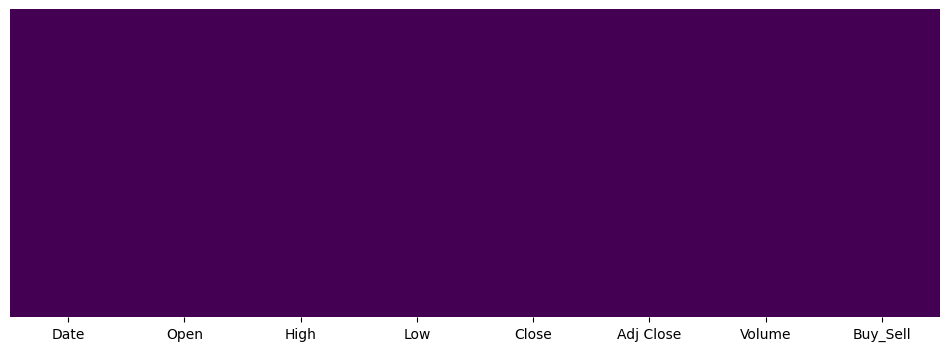

In [8]:
plt.figure(figsize=(12,4))
sns.heatmap(dataset.isnull(), yticklabels=False,cbar=False,cmap='viridis')
plt.savefig("Figure 1: Heatmap for Null Values")

# **Analyze the Data**

In [9]:
# number of rows and number of columns of the dataset
dataset.shape

(1258, 8)

In [10]:
#Total number of records in the dataset
print("Total number of records = ", len(dataset))

Total number of records =  1258


In [11]:
#Column names
dataset.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume',
       'Buy_Sell'],
      dtype='object')

In [12]:
# Data types of the Columns
dataset.dtypes

Date         datetime64[ns]
Open                float64
High                float64
Low                 float64
Close               float64
Adj Close           float64
Volume                int64
Buy_Sell              int64
dtype: object

In [13]:
# Summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1258 entries, 0 to 1257
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       1258 non-null   datetime64[ns]
 1   Open       1258 non-null   float64       
 2   High       1258 non-null   float64       
 3   Low        1258 non-null   float64       
 4   Close      1258 non-null   float64       
 5   Adj Close  1258 non-null   float64       
 6   Volume     1258 non-null   int64         
 7   Buy_Sell   1258 non-null   int64         
dtypes: datetime64[ns](1), float64(5), int64(2)
memory usage: 78.8 KB


array([[<Axes: title={'center': 'Date'}>,
        <Axes: title={'center': 'Open'}>,
        <Axes: title={'center': 'High'}>],
       [<Axes: title={'center': 'Low'}>,
        <Axes: title={'center': 'Close'}>,
        <Axes: title={'center': 'Adj Close'}>],
       [<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Buy_Sell'}>, <Axes: >]], dtype=object)

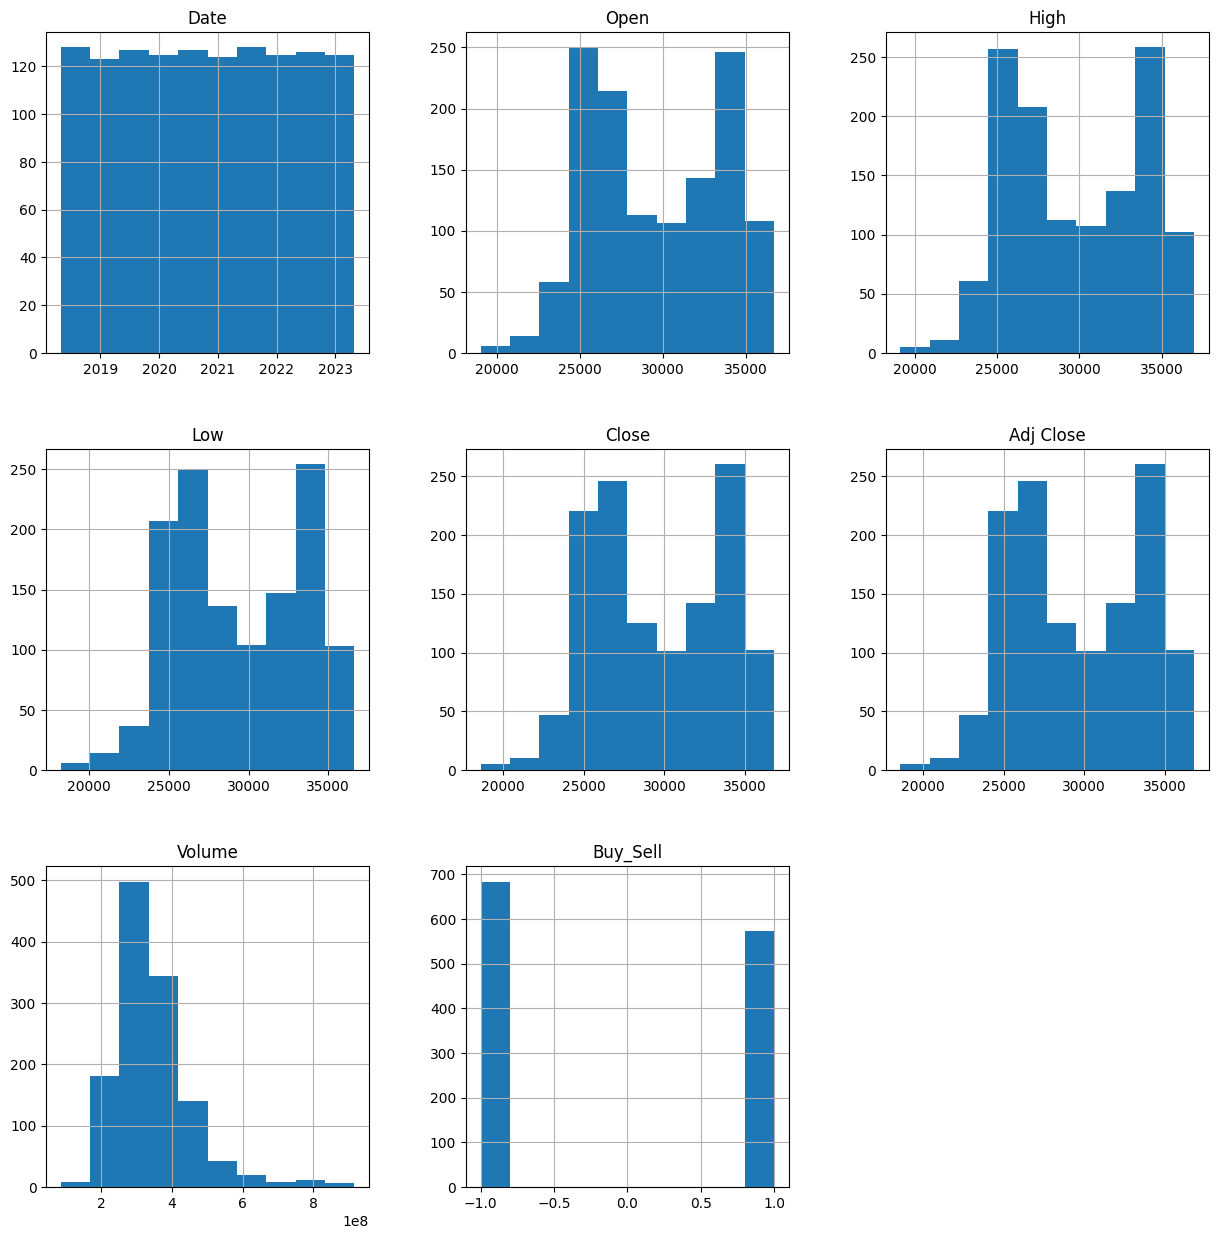

In [14]:
# Histogram per each numerical column in dataset
dataset.hist(figsize=(15, 15))

In [15]:
# Calculate and display descriptive statistics for each numerical column
dataset.describe()

,Date,Open,High,Low,Close,Adj Close,Volume,Buy_Sell
count,1258,1258.000000,1258.000000,1258.000000,1258.000000,1258.000000,1.258000e+03,1258.000000
mean,2020-10-28 09:39:12.305246464,29595.823045,29776.945739,29402.432226,29599.361677,29599.361677,3.450636e+08,-0.087440
min,2018-05-01 00:00:00,19028.360000,19121.010000,18213.650000,18591.930000,18591.930000,8.615000e+07,-1.000000
25%,2019-07-31 06:00:00,26041.267500,26163.155000,25877.872500,26027.120000,26027.120000,2.773125e+08,-1.000000
50%,2020-10-27 12:00:00,29201.410000,29335.685000,28996.500000,29199.460000,29199.460000,3.247250e+08,-1.000000
75%,2022-01-26 18:00:00,33604.027500,33825.445000,33346.827500,33600.342500,33600.342500,3.875100e+08,1.000000
max,2023-04-28 00:00:00,36722.600000,36952.650000,36636.000000,36799.650000,36799.650000,9.159900e+08,1.000000
std,NaN,4006.078299,4009.007573,4004.949066,4007.468822,4007.468822,1.069142e+08,0.996566


# **Define X and Y**

In [16]:
# Convert the 'Buy_Sell' column to integer data type
dataset['Buy_Sell'] = dataset['Buy_Sell'].astype('int')

In [17]:
# Define X
# Select the columns 'Open', 'High', 'Low', 'Adj Close', 'Volume' from the dataset
# and convert them into a NumPy array X
X = np.asarray(dataset[['Open', 'High', 'Low', 'Adj Close', 'Volume']])

# Display the first 5 rows of the array X
X[0:5]


array([[3.379743e+04, 3.410456e+04, 3.372840e+04, 3.409816e+04,
        3.543100e+08],
       [3.338166e+04, 3.385975e+04, 3.337465e+04, 3.382616e+04,
        3.432400e+08],
       [3.359634e+04, 3.364583e+04, 3.323585e+04, 3.330187e+04,
        3.211700e+08],
       [3.382834e+04, 3.387549e+04, 3.352539e+04, 3.353083e+04,
        2.978800e+08],
       [3.380504e+04, 3.389115e+04, 3.372609e+04, 3.387540e+04,
        2.520200e+08]])

In [18]:
# Define y
# Select the 'Buy_Sell' column from the dataset
# and convert it into a NumPy array y
y = np.asarray(dataset['Buy_Sell'])

# Display the first 5 elements of the array y
y[0:5]


array([-1, -1,  1,  1, -1])

In [19]:
from sklearn import preprocessing
X = preprocessing.StandardScaler().fit(X).transform(X)
X[0:5]

array([[ 1.0492251 ,  1.07990201,  1.08058507,  1.1230499 ,  0.08651847],
       [ 0.94539904,  1.01881273,  0.99222173,  1.05514964, -0.01706368],
       [ 0.99900892,  0.96543167,  0.95755083,  0.9242694 , -0.223573  ],
       [ 1.05694394,  1.02274045,  1.02987513,  0.98142544, -0.44149787],
       [ 1.05112547,  1.02664821,  1.08000806,  1.06744159, -0.87061056]])

# **Split Train data and Test data**

In [20]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (943, 5) (943,)
Test set: (315, 5) (315,)


# **Dataset Traning and Model Traning**

In [21]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, solver='liblinear')

# **Comparison of Actual Values and Predictions Values**

In [22]:
# Predicting the Test set results
y_pred = LR.predict(X_test)
y_pred

array([-1,  1, -1, -1, -1, -1,  1, -1, -1,  1,  1,  1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1,  1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,  1, -1, -1, -1,  1,
       -1, -1,  1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1, -1, -1,  1,
       -1, -1, -1,  1, -1, -1, -1, -1, -1, -1,  1,  1, -1, -1,  1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1,  1,  1, -1,  1,  1,
       -1,  1, -1, -1,  1, -1,  1,  1,  1, -1, -1,  1, -1,  1, -1, -1, -1,
       -1, -1,  1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1, -1, -1,  1,  1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  1, -1, -1, -1,
        1, -1, -1,  1,  1

In [23]:
# Calculate the predicted probabilities for each class (0 and 1) using the test data
y_pred_prob = LR.predict_proba(X_test)

# Display the predicted probabilities
y_pred_prob


array([[0.54533889, 0.45466111],
       [0.49701402, 0.50298598],
       [0.54132405, 0.45867595],
       [0.56242227, 0.43757773],
       [0.53351917, 0.46648083],
       [0.53821733, 0.46178267],
       [0.36848801, 0.63151199],
       [0.53349754, 0.46650246],
       [0.5448762 , 0.4551238 ],
       [0.48916333, 0.51083667],
       [0.48719904, 0.51280096],
       [0.46900883, 0.53099117],
       [0.60391491, 0.39608509],
       [0.5479261 , 0.4520739 ],
       [0.5232509 , 0.4767491 ],
       [0.5568329 , 0.4431671 ],
       [0.5493885 , 0.4506115 ],
       [0.58103731, 0.41896269],
       [0.58155471, 0.41844529],
       [0.57367197, 0.42632803],
       [0.52352809, 0.47647191],
       [0.45312886, 0.54687114],
       [0.53347314, 0.46652686],
       [0.54046611, 0.45953389],
       [0.57633385, 0.42366615],
       [0.54056296, 0.45943704],
       [0.56646334, 0.43353666],
       [0.59698314, 0.40301686],
       [0.54198743, 0.45801257],
       [0.51050284, 0.48949716],
       [0.

In [24]:
# Create a DataFrame to display y_test and y_pred
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

# Display the DataFrame
print(results_df)

     Actual  Predicted
0        -1         -1
1         1          1
2        -1         -1
3         1         -1
4         1         -1
..      ...        ...
310      -1          1
311       1         -1
312      -1         -1
313      -1         -1
314       1         -1

[315 rows x 2 columns]


# **Accuracy and Loss Function Values of the Model**

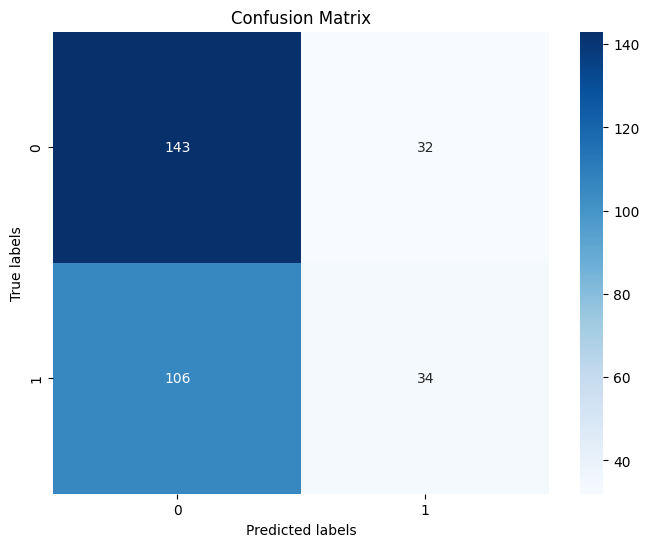

In [25]:
from sklearn.metrics import confusion_matrix, classification_report

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()

In [26]:
# Print a classification report showing precision, recall, F1-score, and other metrics
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

          -1       0.57      0.82      0.67       175
           1       0.52      0.24      0.33       140

    accuracy                           0.56       315
   macro avg       0.54      0.53      0.50       315
weighted avg       0.55      0.56      0.52       315



In [27]:
from sklearn import metrics

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Precision:",metrics.precision_score(y_test, y_pred))
print("Recall:",metrics.recall_score(y_test, y_pred))


Accuracy: 0.5619047619047619
Precision: 0.5151515151515151
Recall: 0.24285714285714285


In [28]:
# Calculate and print the log loss between the true labels and predicted probabilities.
from sklearn.metrics import log_loss
log_loss(y_test, y_pred_prob)


0.6847759219838309

In [29]:
# Train a logistic regression model with a different solver ('sag') and calculate the log loss
LR2 = LogisticRegression(C=0.01, solver='sag').fit(X_train,y_train)

# Calculate the predicted probabilities for the test data
y_pred_prob2 = LR2.predict_proba(X_test)

# Calculate and print the log loss between the true labels and the predicted probabilities
print ("LogLoss: : %.2f" % log_loss(y_test, y_pred_prob2))


LogLoss: : 0.68


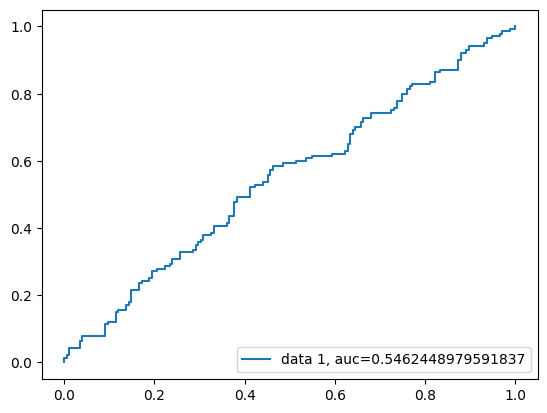

In [30]:
# Calculate ROC curve and AUC for the logistic regression model
y_pred_proba = LR.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

# Plot ROC curve
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [31]:
print("LogLoss: : %.2f" % log_loss(y_test, y_pred_prob))

LogLoss: : 0.68


In [32]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5619047619047619
